In [1]:
import numpy as np
import myBayes as bayes

/Applications/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Applications/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dummy data set

In [3]:
words, labels = bayes.load_data_set()

#### Get vocabulary

In [4]:
vocab = bayes.vocabulary(words)
vocab

array(['I', 'ate', 'buying', 'cute', 'dalmation', 'dog', 'flea', 'food',
       'garbage', 'has', 'help', 'him', 'how', 'is', 'licks', 'love',
       'maybe', 'mr', 'my', 'not', 'park', 'please', 'posting', 'problems',
       'quit', 'so', 'steak', 'stop', 'stupid', 'take', 'to', 'worthless'], 
      dtype='<U9')

#### Transform to vectors

In [5]:
vectors = bayes.dataset_to_vector(vocab, words)
vectors

array([[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1]])

#### Train

In [6]:
class_probs, label_probs = bayes.train(vectors, labels)

In [7]:
print(class_probs)
print(label_probs)

{'abusive': array([-3.04452244, -3.04452244, -2.35137526, -3.04452244, -3.04452244,
       -1.94591015, -3.04452244, -2.35137526, -2.35137526, -3.04452244,
       -3.04452244, -2.35137526, -3.04452244, -3.04452244, -3.04452244,
       -3.04452244, -2.35137526, -3.04452244, -3.04452244, -2.35137526,
       -2.35137526, -3.04452244, -2.35137526, -3.04452244, -2.35137526,
       -3.04452244, -3.04452244, -2.35137526, -1.65822808, -2.35137526,
       -2.35137526, -1.94591015]), 'non abusive': array([-2.56494936, -2.56494936, -3.25809654, -2.56494936, -2.56494936,
       -2.56494936, -2.56494936, -3.25809654, -3.25809654, -2.56494936,
       -2.56494936, -2.15948425, -2.56494936, -2.56494936, -2.56494936,
       -2.56494936, -3.25809654, -2.56494936, -1.87180218, -3.25809654,
       -3.25809654, -2.56494936, -3.25809654, -2.56494936, -3.25809654,
       -2.56494936, -2.56494936, -2.56494936, -3.25809654, -3.25809654,
       -2.56494936, -3.25809654])}
{'abusive': -0.69314718055994529, 'non 

#### Classify

In [8]:
test_data = bayes.to_vector(vocab, ['love', 'my', 'dalmation'])
classifier_output = bayes.classify(class_probs, label_probs, test_data)
print(classifier_output)

non abusive


In [9]:
test_data = bayes.to_vector(vocab, ['stupid', 'garbage'])
classifier_output = bayes.classify(class_probs, label_probs, test_data)
print(classifier_output)

abusive


In [10]:
test_text = np.random.choice(vocab, size=10)
test_data = bayes.to_vector(vocab, test_text)
classifier_output = bayes.classify(class_probs, label_probs, test_data)
print(test_text)
print(classifier_output)

['maybe' 'not' 'so' 'I' 'garbage' 'problems' 'so' 'has' 'steak' 'please']
non abusive


# Mail data set

#### Average error rate

In [11]:
np.mean(list(bayes.test_spam(0.8) for i in range(100)))

/Users/Gonzalo/github/machinelearninginaction/Ch04/myBayes.py:26: FutureWarning: split() requires a non-empty pattern match.
  regex.split(text)))


7.0999999999999996

# Feed data set

#### Average error rate

In [51]:
np.mean([bayes.test_feeds() for i in range(100)])

/Users/Gonzalo/github/machinelearninginaction/Ch04/myBayes.py:27: FutureWarning: split() requires a non-empty pattern match.
  regex.split(text)))


29.899999999999999

#### Error rate as a function of the number of top words ignored

/Users/Gonzalo/github/machinelearninginaction/Ch04/myBayes.py:27: FutureWarning: split() requires a non-empty pattern match.
  regex.split(text)))


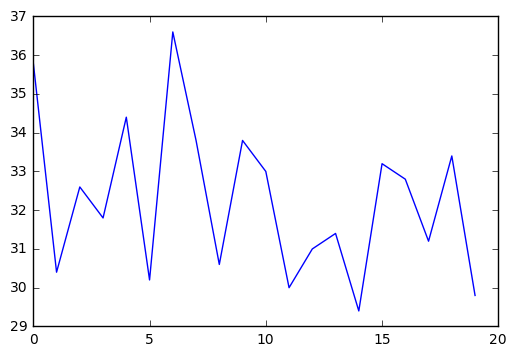

In [58]:
plt.plot([np.mean([bayes.test_feeds(0.8, tr).error_rate for i in range(50)]) for tr in range(-30, -10)])

#### Print top words for each city

In [80]:
_, class_probs, label_probs, vocab = bayes.test_feeds()
for lbl, probs in class_probs.items():
    print("In {} the top-used words are {}".format(lbl,
                                                   vocab[np.argsort(probs)[-10:]]))
    

In NY the top-used words are ['her' 'would' 'can' 'that' 'with' 'you' 'looking' 'the' 'and' 'for']
In SF the top-used words are ['bay' 'got' 'who' 'like' 'the' 'with' 'you' 'looking' 'for' 'and']


/Users/Gonzalo/github/machinelearninginaction/Ch04/myBayes.py:28: FutureWarning: split() requires a non-empty pattern match.
  
